In [46]:
import pandas as pd

df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
print(df.shape, test_df.shape)

(2190, 13) (730, 12)


In [47]:
df.drop_duplicates(inplace=True)    # 删除重复行
df.info()   # 没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [48]:
test_df.info()  # winddirection中有一个缺失值
test_df.fillna(test_df.mean(), inplace=True)  # 用均值填充缺失值
df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


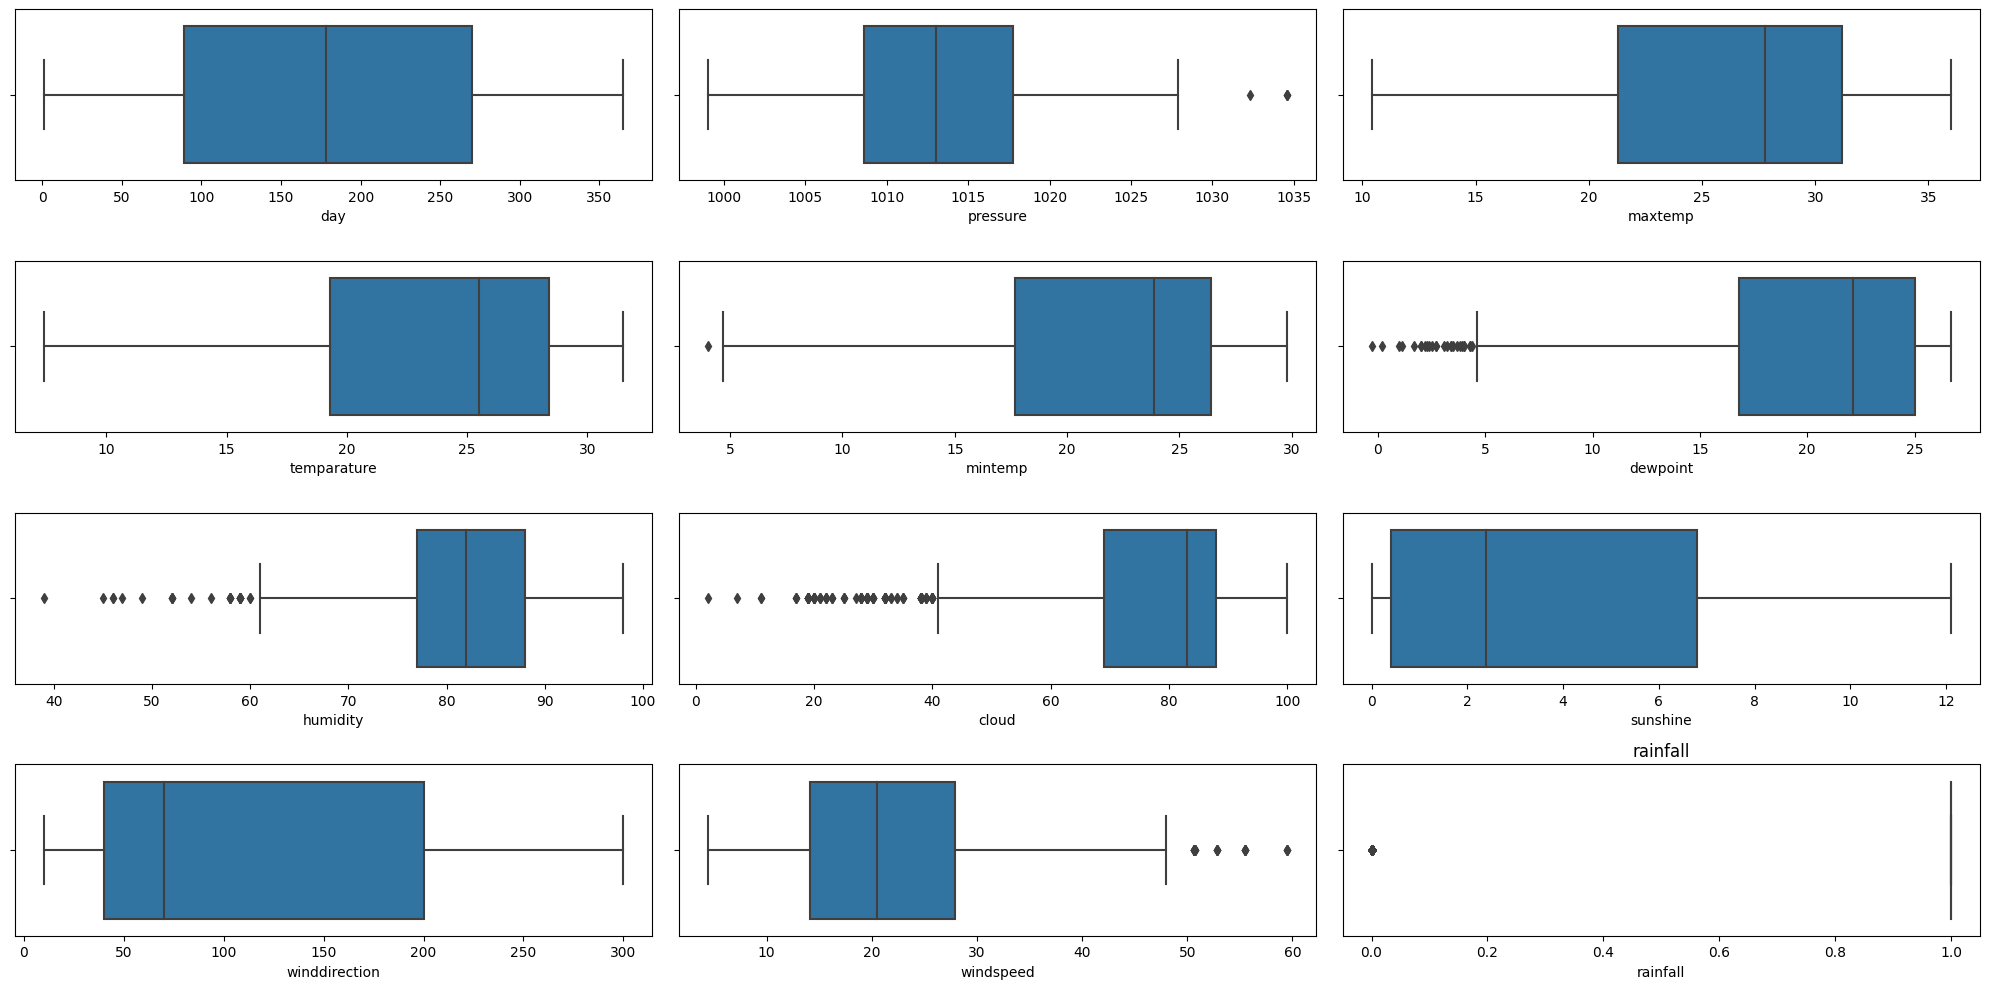

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 3, figsize=(20, 10))
ax = ax.flatten()
i = 0
for col in df.columns:
    sns.boxplot(data=df, x=df[col], ax=ax[i])
    plt.title(col)
    i += 1
plt.tight_layout()  # 自动调整子图和标签的位置，以确保它们之间不会相互重叠
plt.show()

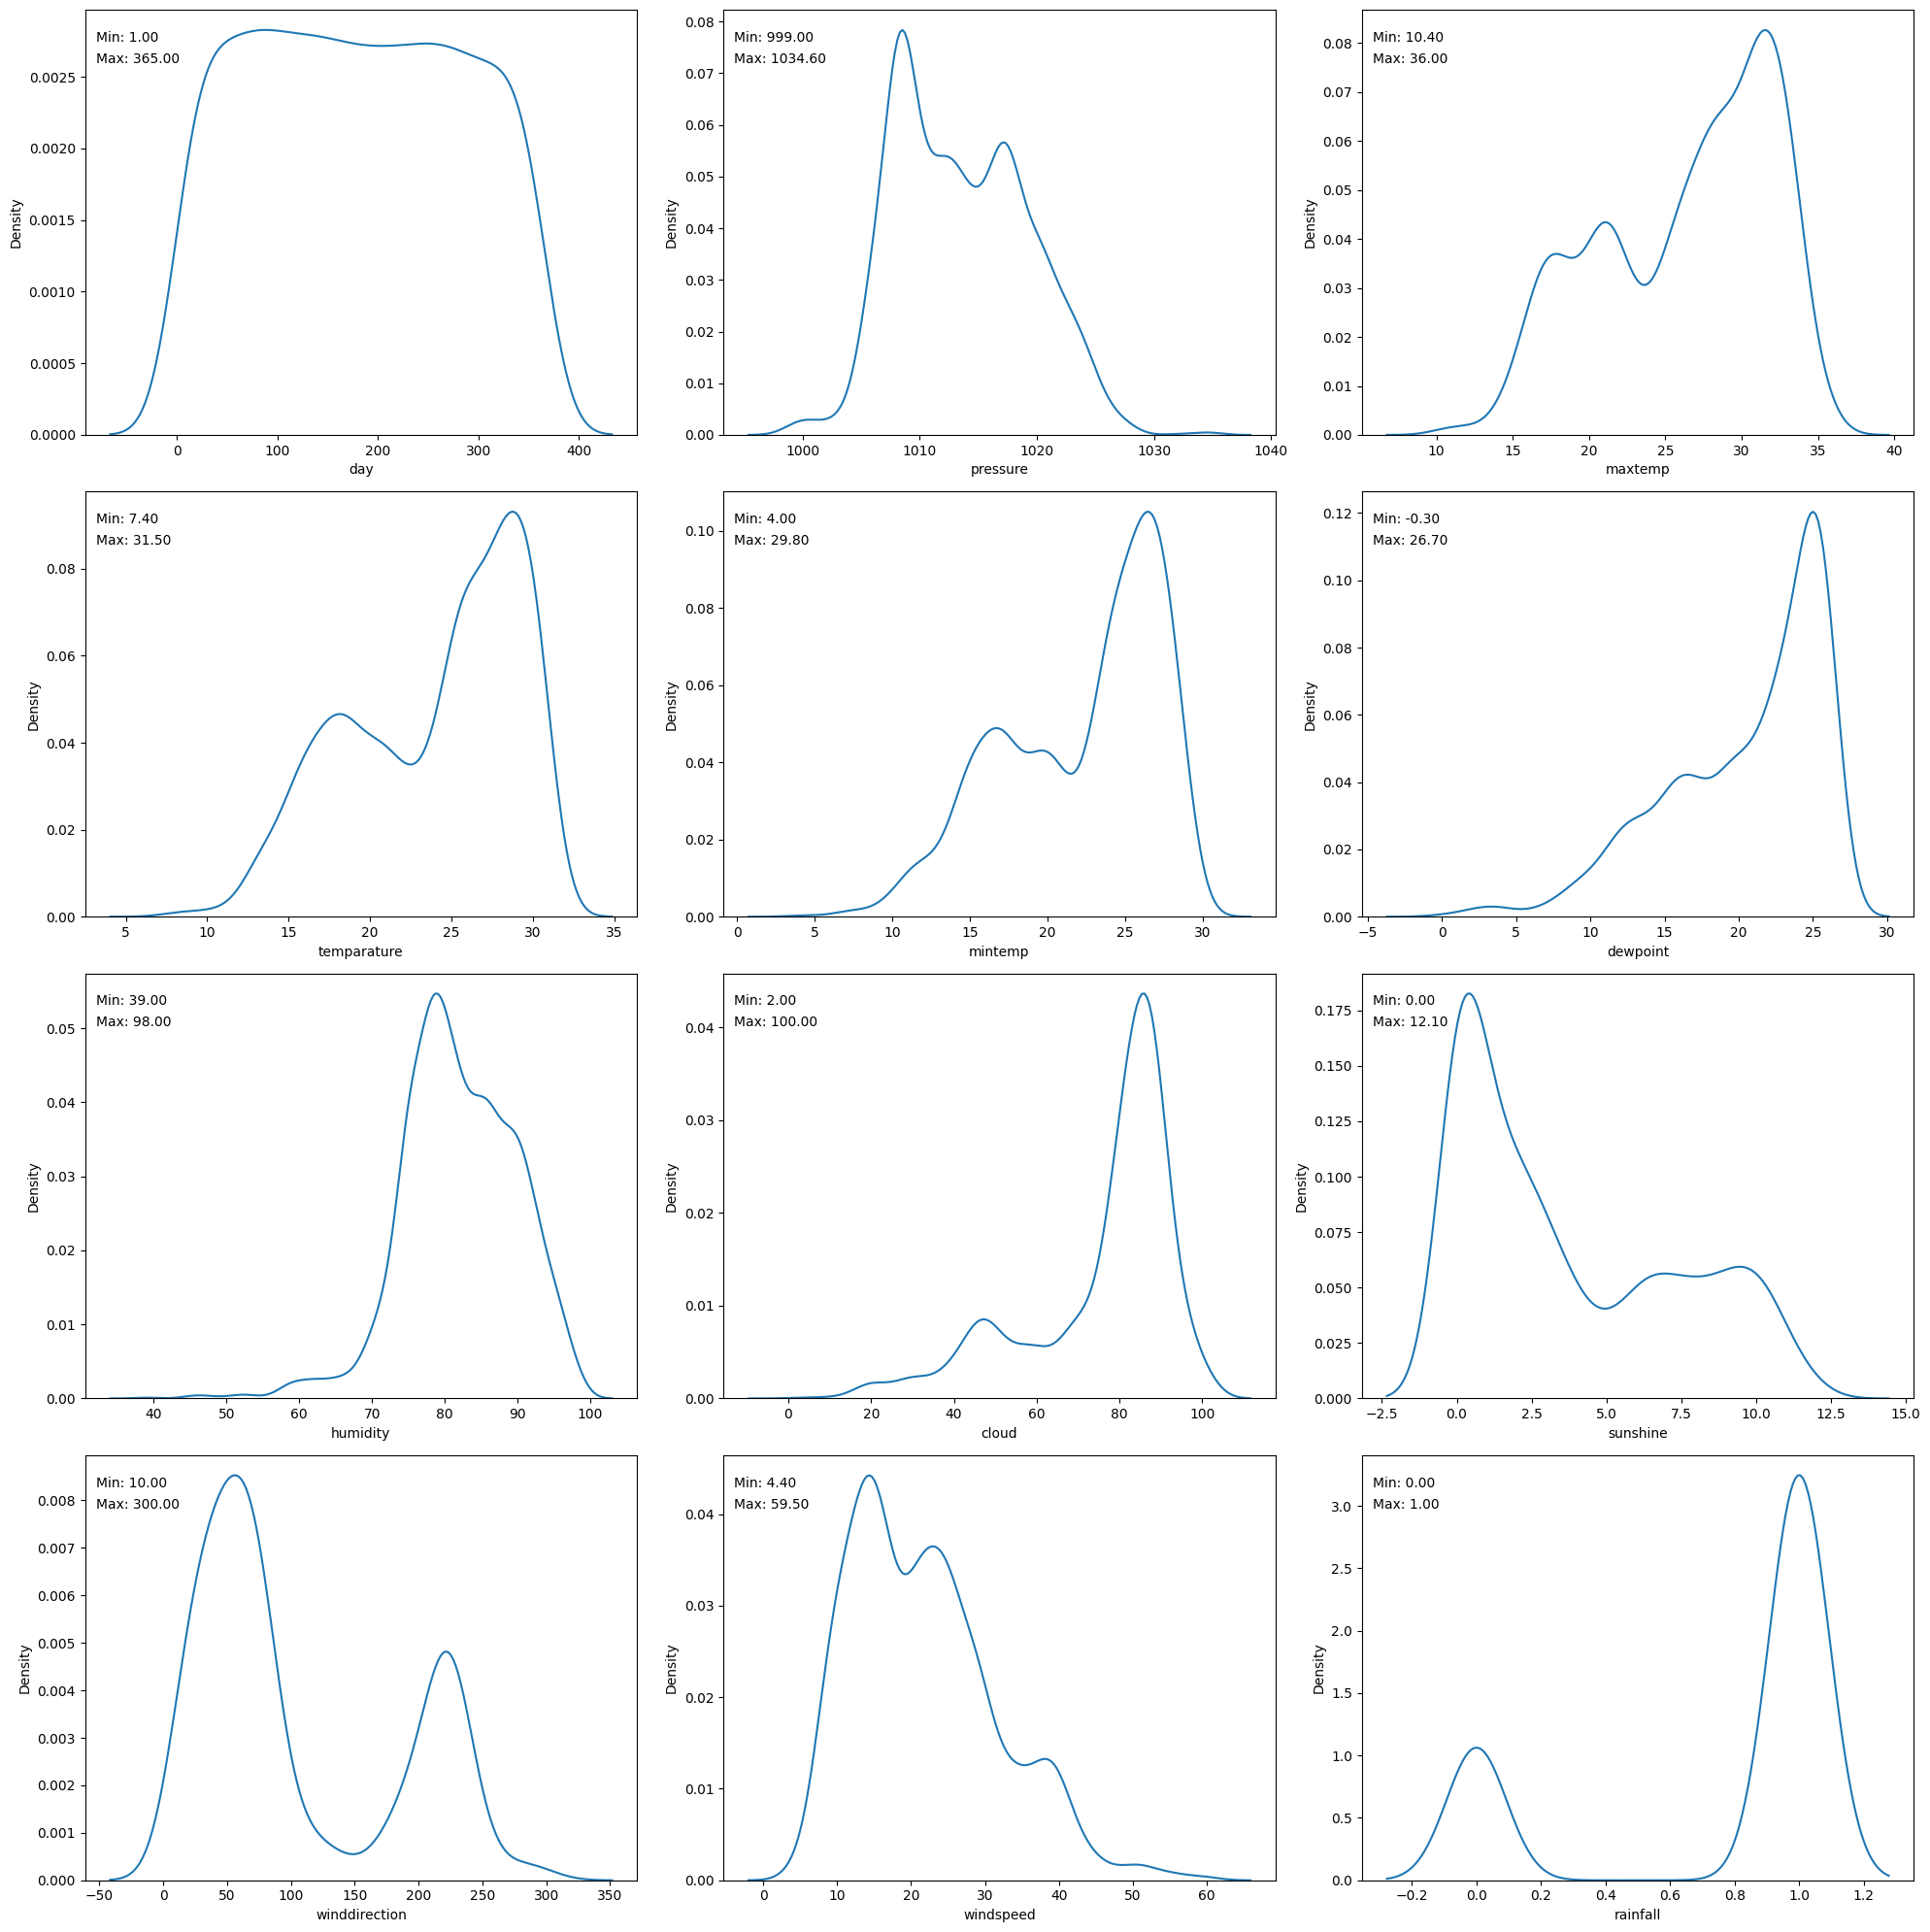

In [60]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
for col in df.columns:
    sns.kdeplot(data=df, x=df[col], ax=ax[i])   # 估计每个特征的概率密度函数
    ax[i].text(0.02, 0.95, f'Min: {df[col].min():.2f}', transform=ax[i].transAxes, fontsize=10, verticalalignment='top')
    ax[i].text(0.02, 0.90, f'Max: {df[col].max():.2f}', transform=ax[i].transAxes, fontsize=10, verticalalignment='top')
    i += 1
plt.tight_layout()
plt.show()

- 'day'分布均匀，其值从1到365，说明数据很可能覆盖了很多个全年的信息
- 'pressure'呈现双峰分布，两个峰值分别对应不同的气压范围，可能表示存在高压和低压两种气压状态
- 'maxtemp'和'mintemp'都显示出了三个明显的峰值，很可能对应三种不同的气候状态
- 'temperature'呈现双峰分布，体现了冬天和夏天的大致气温
- 'dewpoint'呈现单峰分布（也可以认为是双峰分布），说明该地区常年有较高的露点，偶尔几天露点很低
- 'humidity'和'cloud'大部分都分布在80%~90%，说明该地区常年湿润、多云，偶尔几天不那么湿润，不那么多云
- 'sunshine'呈现双峰分布，大部分时间阳光接近0，另有一部分时间阳光较大，说明该地区常年多云，偶尔晴天
- 'winddirection'呈现双峰分布，说明风向在这两个方向上出现的频率较高，有可能一年中特定的两段时间对应了这两种不同的风向
- 'windspeed'大部分值比较低，说明该地区常年风速小，偶尔有强风